## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = 'left', on = 'Mouse ID')

#show data table
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_data_complete['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_df = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = mouse_data_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'last')
#clean_mouse_df = cleaned_mouse_df[cleaned_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df['Mouse ID'].nunique()


249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = cleaned_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = cleaned_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = cleaned_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = cleaned_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = cleaned_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']



In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and Sem of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({'Mean':mean,
             'Median':median,
             'Variance':variance,
             'Standard Deviation':standard_dev,
             'SEM':sems})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

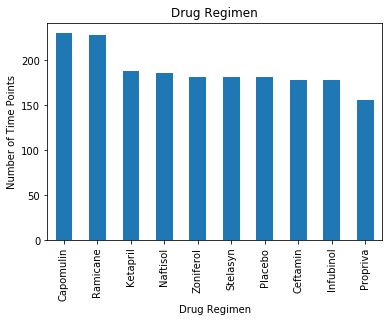

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
counts = cleaned_mouse_df['Drug Regimen'].value_counts()

#plot bar using pandas DataFrfame.plot
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Drug Regimen')
plt.show()


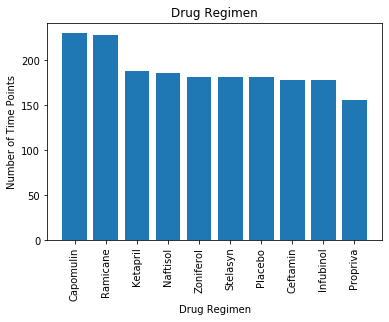

In [49]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#plot bar using pyplot 

counts = cleaned_mouse_df['Drug Regimen'].value_counts()

plt.bar(counts.index,counts.values)
plt.xticks(rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Time Points')
plt.title('Drug Regimen')
plt.show()


## Pie Plots

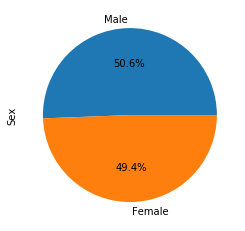

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_data_complete.Sex.value_counts()
counts.plot(kind='pie',autopct = '%1.1f%%')


Text(0, 0.5, 'Sex')

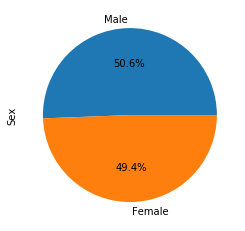

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_data_complete.Sex.value_counts()
labels = ['Male', 'Female']
plt.pie(counts.values,labels = counts.index, autopct = '%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#maximum point of each mouse
max_tumor_volume = cleaned_mouse_df.groupby(['Mouse ID']).max()
#set Mouse ID as index
max_tumor_volume = max_tumor_volume.reset_index()
#merge the new tumor df with the cleaned df
tumor_merged_data = max_tumor_volume[['Mouse ID','Timepoint']].merge(cleaned_mouse_df,on = ['Mouse ID','Timepoint'])
tumor_merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [ ]:
#check or get the four most promising treatment regimen from previous bar graphs


In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

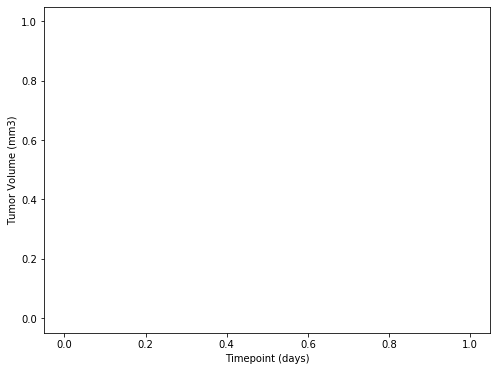

In [101]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mmm = cleaned_mouse_df[cleaned_mouse_df['Mouse ID'] == '1509']

fig, axl = plt.subplots(figsize=(8,6))
plt.plot(mmm['Timepoint'], mmm['Tumor Volume (mm3)'])
axl.set_ylabel('Tumor Volume (mm3)')
axl.set_xlabel('Timepoint (days)')
plt.show()



In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [1]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
